In [ ]:
pip install yfinance

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

[*********************100%***********************]  1 of 1 completed


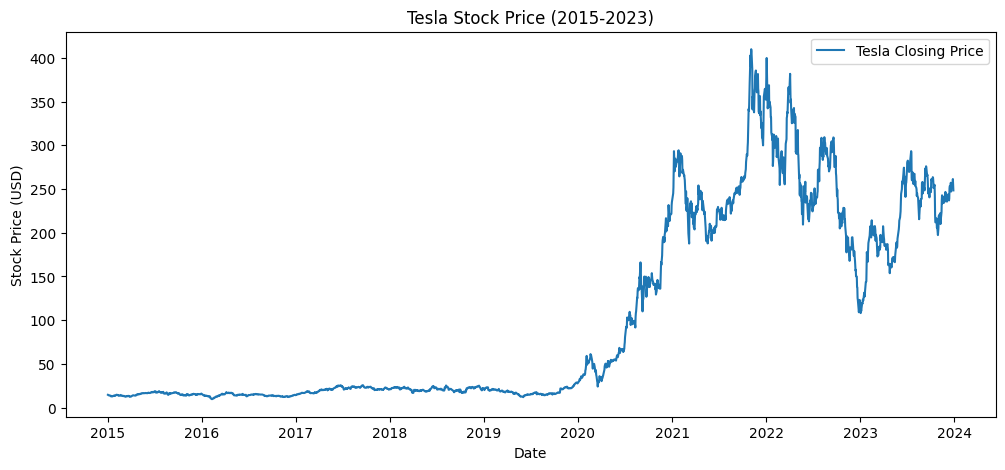

In [20]:
# Fetch Tesla stock data
df = yf.download('TSLA', start='2015-01-01', end='2023-12-31')

# Keep only the 'Close' price
df = df[['Close']]

# Plot the stock price
plt.figure(figsize=(12,5))
plt.plot(df, label='Tesla Closing Price')
plt.title('Tesla Stock Price (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [21]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is Non-Stationary")

# Run ADF Test
adf_test(df['Close'])

ADF Statistic: -1.0815709783181875
p-value: 0.722364956482304
Series is Non-Stationary


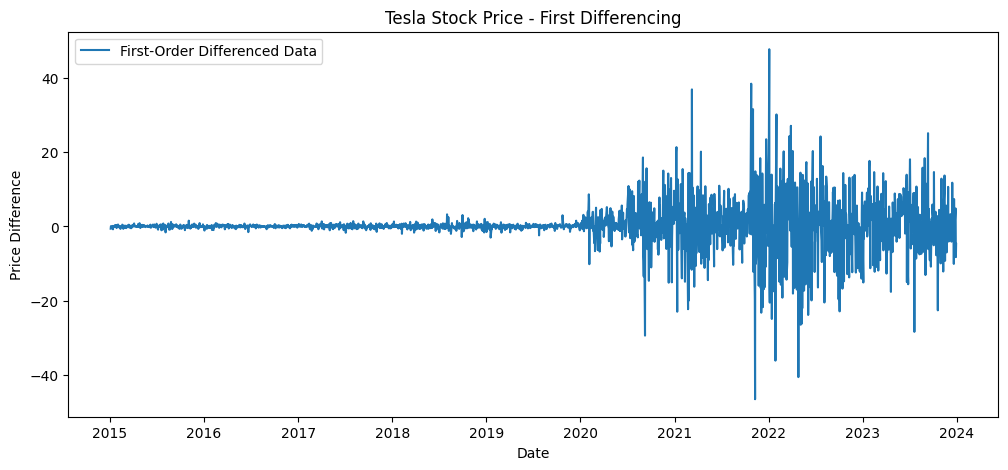

ADF Statistic: -9.534725626008981
p-value: 2.8287579898669144e-16
Series is Stationary


In [22]:
df_diff = df['Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12,5))
plt.plot(df_diff, label='First-Order Differenced Data')
plt.title('Tesla Stock Price - First Differencing')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

# Run ADF Test again
adf_test(df_diff)

In [23]:
df_diff2 = df_diff.diff().dropna()
adf_test(df_diff2)

ADF Statistic: -14.614731387106922
p-value: 3.970973059033876e-27
Series is Stationary


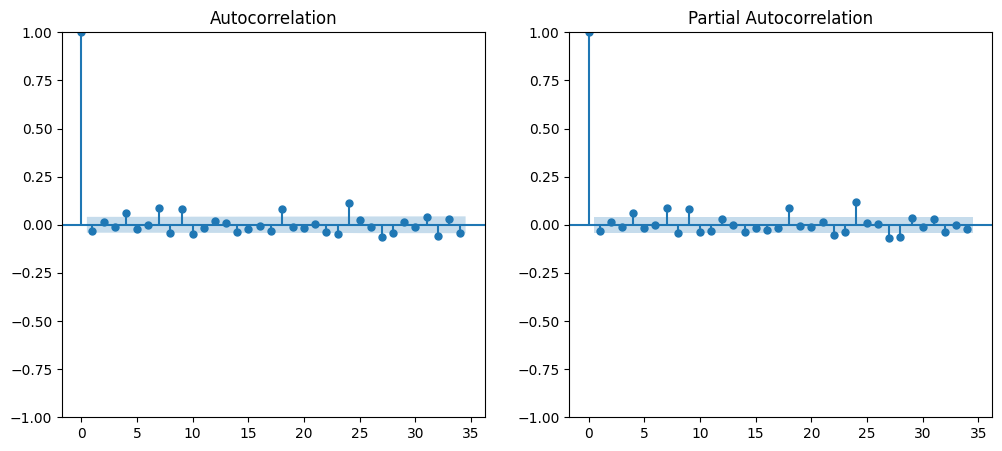

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

plot_acf(df_diff, ax=axes[0])  # MA(q) order
plot_pacf(df_diff, ax=axes[1])  # AR(p) order

plt.show()

In [25]:
# Fit ARIMA Model (Example: p=2, d=1, q=2)
model = ARIMA(df['Close'], order=(2,1,2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

c:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7152.245
Date:                Mon, 10 Feb 2025   AIC                          14314.490
Time:                        19:50:46   BIC                          14343.112
Sample:                             0   HQIC                         14324.934
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4108      3.435     -0.120      0.905      -7.143       6.321
ar.L2          0.1000      2.187      0.046      0.964      -4.186       4.386
ma.L1          0.3807      3.435      0.111      0.9

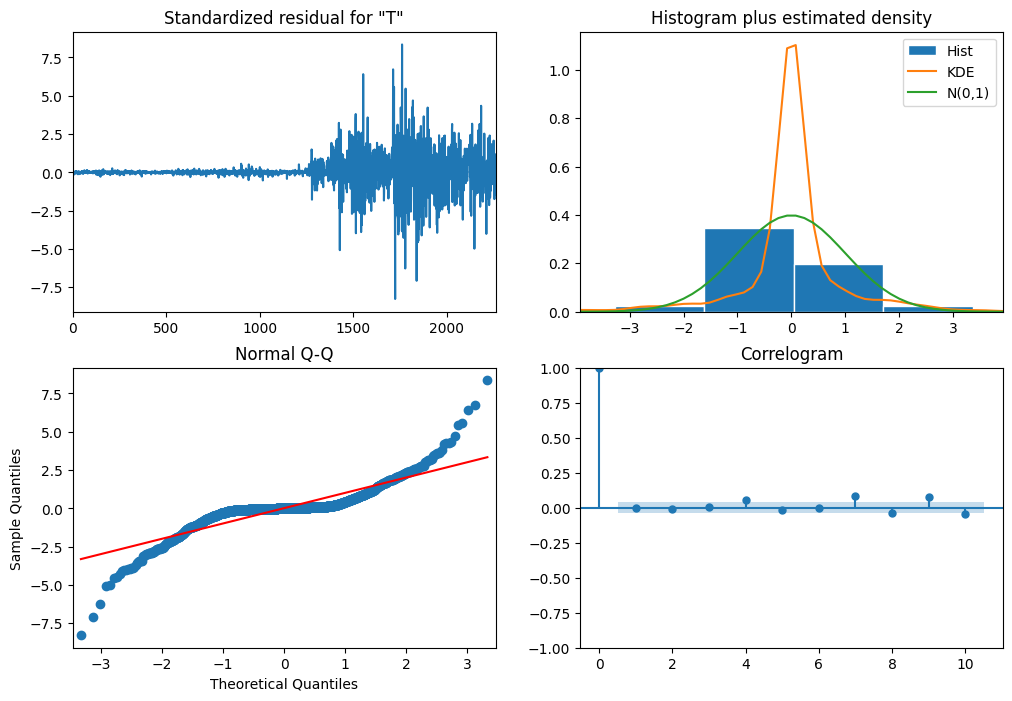

In [26]:
model_fit.plot_diagnostics(figsize=(12,8))
plt.show()

In [27]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

c:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
# Create future date range
future_dates = pd.date_range(df.index[-1], periods=30, freq='B')  # 'B' means business days

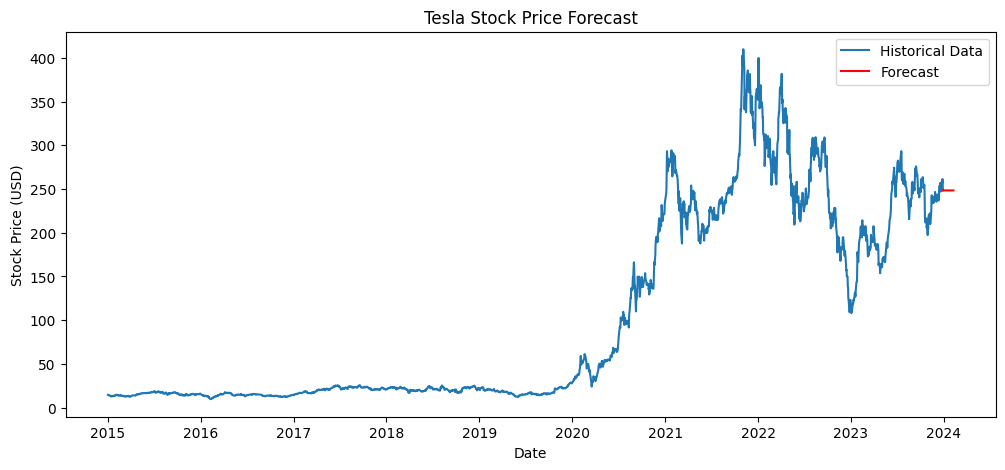

In [29]:
# Plot the forecast
plt.figure(figsize=(12,5))
plt.plot(df, label='Historical Data')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()